# Benchmark viz

In [67]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [68]:
RESULT_ROOT = '/home/romilb/research/msr/results/system_impl/benchmarking/zurich_scaling_bs8'

In [69]:
data = pd.read_csv(os.path.join(RESULT_ROOT, 'log.csv'), names=['alloc', 'task_id', 'time'])
# Remove task 0
data = data[data["task_id"] != 0]

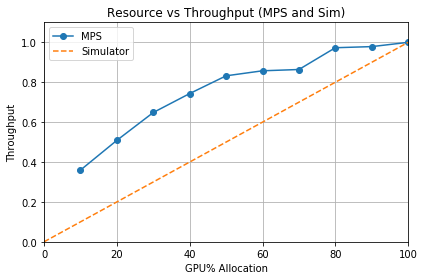

In [70]:
plt.figure()
ax = plt.gca()
scaled_xput = data.groupby('alloc').mean()
scaled_xput = scaled_xput/scaled_xput.min()
scaled_xput = 1/scaled_xput

scaled_errs = data.groupby('alloc').std()
scaled_errs = scaled_errs/data.groupby('alloc').mean().min()
scaled_errs = 1/scaled_errs

scaled_xput.plot(y='time', ax=ax, label='MPS', marker='o')#, yerr=scaled_errs['time'], capsize=4)
ax.set_ylabel('Throughput')
ax.set_xlabel('GPU% Allocation')
ax.set_xlim([0,100])
ax.set_ylim([0,1.1])
linear_x = np.linspace(0, 100, 1000)
linear_y = linear_x/100
ax.plot(linear_x, linear_y, ls='--', label='Simulator')
ax.legend()
ax.grid()
plt.title('Resource vs Throughput (MPS and Sim)')
plt.tight_layout()
plt.savefig('scaling.pdf')

In [71]:
data.groupby('alloc').mean()

,task_id,time
alloc,,
10,5,15.185301
20,5,10.732497
30,5,8.423063
40,5,7.346349
50,5,6.561887
60,5,6.369023
70,5,6.321470
80,5,5.612063
90,5,5.579987


In [56]:
scaled_xput.min()

task_id    1.00000
time       0.35331
dtype: float64

# Comparing with profiles

In [65]:
PROFILE_COLUMNS = ["timestamp", "train_time", "train_loss", "train_acc", "train_num_batches",
                            "val_time", "val_loss", "val_acc", "val_num_batches",
                  "test_time", "test_loss", "test_acc", "test_num_batches"]

profile_path = '/home/romilb/research/msr/results/profiling/june_impl/20200617_2121_no101_no50/zurich/0_profile.json'
with open(profile_path) as f:
    profile_json = json.load(f)

In [66]:
TASK_ID = '4'
x=pd.DataFrame(profile_json[TASK_ID], columns=PROFILE_COLUMNS)
resource_time = sum(x.loc[0:9]['train_time'])
print(resource_time)

5.021055698394775
